# DBSCAN Clustering using defeault parameters

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.drop('species' , axis=1))


In [ ]:

dbscan = DBSCAN(eps=0.5 , min_samples=4)
dbscan.fit(scaled_data)

,eps,0.5
,min_samples,4
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [ ]:
X = df.drop('species', axis=1)
df['Cluster'] = dbscan.labels_

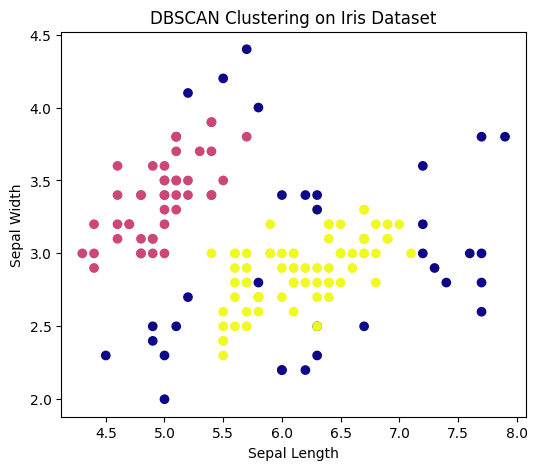

In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(X['sepal_length'], X['sepal_width'], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()


### Use the K-distance graph to find a good eps
* eps (Epsilon) → Maximum distance between two samples to be considered neighbors.


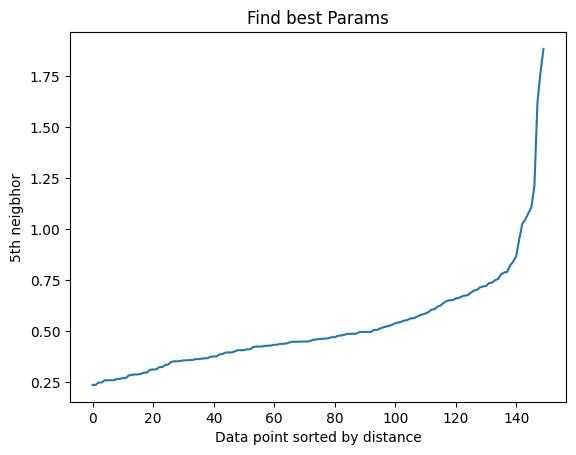

Optimal eps: 0.7215753955580272


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

df = sns.load_dataset('iris')

scalar = StandardScaler()
scaled = scalar.fit_transform(df.drop('species', axis=1))

neighbor = NearestNeighbors(n_neighbors=5)
neighbor_fit = neighbor.fit(scaled)
distances, indices = neighbor_fit.kneighbors(scaled)
distances = np.sort(distances[:,4])

plt.plot(distances)

kneedle = KneeLocator(range(len(distances)), distances, curve='convex', direction='increasing')
plt.title('Find best Params')
plt.xlabel('Data point sorted by distance')
plt.ylabel('5th neigbhor')
plt.show()
print("Optimal eps:", distances[kneedle.knee])

# Putting the Best value of eps

Silhouette Score: 0.5080668523761809


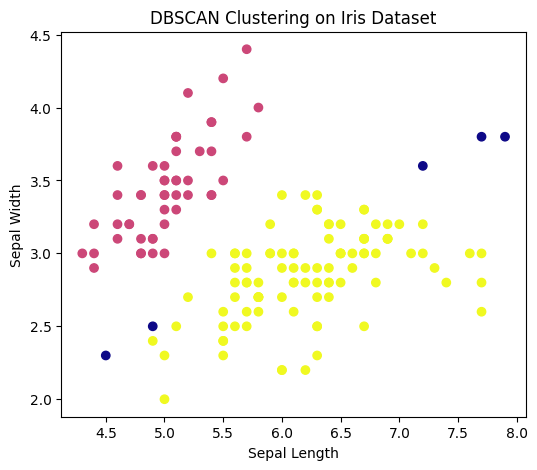

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
#Load the data
df = sns.load_dataset('iris')

#Scale 
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df.drop('species' , axis=1))

#Using DBSCAN
dbscan = DBSCAN(eps=0.72 , min_samples=4)
dbscan.fit(scaled_data)

#Separate Features
X = df.drop('species', axis=1)
df['Cluster'] = dbscan.labels_

score = silhouette_score(scaled, dbscan.labels_)
print("Silhouette Score:", score)

#plot the graph
plt.figure(figsize=(6,5))
plt.scatter(X['sepal_length'], X['sepal_width'], c=dbscan.labels_, cmap='plasma')
plt.title("DBSCAN Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()
